# Simulations

This notebook introduces the simulations used in this project.

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from fooof.sim import gen_power_spectrum

from neurodsp.sim import (sim_powerlaw, sim_synaptic_current, sim_oscillation,
                          sim_combined, sim_peak_oscillation)
from neurodsp.utils import create_times, set_random_seed
from neurodsp.plts import plot_time_series, plot_power_spectra

/var/folders/59/8y2d5r257c77vzymnqs47x080000gn/T/ipykernel_35150/960098113.py:6: DeprecationWarning: 
The `fooof` package is being deprecated and replaced by the `specparam` (spectral parameterization) package.
This version of `fooof` (1.1) is fully functional, but will not be further updated.
New projects are recommended to update to using `specparam` (see Changelog for details).
  from fooof.sim import gen_power_spectrum


In [2]:
# Import custom code
import sys; from pathlib import Path
sys.path.append(str(Path('..').resolve()))
from apm.io import APMDB, save_pickle, load_pickle
from apm.sim import sim_across_values
from apm.sim.sim import sim_combined_peak
from apm.sim.settings import (N_SIMS, EXPS, KNEES, FREQS, POWERS, BWS, KNEES,
                              SIM_PARAMS_AP, SIM_PARAMS_COMB, SIM_PARAMS_KNEE, SIM_PARAMS_PEAK)
from apm.plts.data import plot_timeseries_and_psd
from apm.plts.style import custom_psd_style

# Import the pre-computed example signals
from apm.sim.examples import TIMES, SIG_AP, SIG_KN, SIG_OSC, SIG_COMB, SIG_BURST, SIG_PEAK

In [3]:
# Set plot style
import seaborn as sns
sns.set_context('talk')

## Settings

First, we will define some settings for the simulations.

In [4]:
# Set random seed
set_random_seed(111)

In [5]:
# General simulation Settings
n_seconds = 10
fs = 500

# Component parameters
default_exp = -1.0
default_freq = 10
default_bw = 1.5
default_height = 1.5
f_range = (1, None)

In [6]:
# Collect together parameters for combined signals
comps_osc = {'sim_powerlaw' : {'exponent' : default_exp},
             'sim_oscillation' : {'freq' : default_freq}}
comps_burst = {'sim_powerlaw' : {'exponent' : default_exp},
               'sim_bursty_oscillation' : {'freq' : default_freq}}
peak_params = {'freq' : default_freq, 'bw' : default_bw, 'height' : default_height}

In [7]:
# Create a times vector for time series
times = create_times(n_seconds, fs)

In [8]:
# Plot settings
plt_kwargs = {'xlabel' : '', 'ylabel' : ''}

In [9]:
# Settings for saving figures
SAVE_FIG = True
EXT = '.pdf'
FIGPATH = APMDB().figs_path / '03_sims'

In [10]:
# Settings for saving out simulations
SIMPATH = APMDB().sims_path / 'time_series'

## Time Series Simulations

Time series are simulated using [NeuroDSP](https://neurodsp-tools.github.io/). 

### Powerlaw Signal

First, we can simulate a 'powerlaw' signal, a 1/f signal that follow a powerlaw in the frequency domain. 

In [11]:
# Simulate a powerlaw signal
sig_pow = sim_powerlaw(n_seconds, fs, default_exp, f_range=f_range)

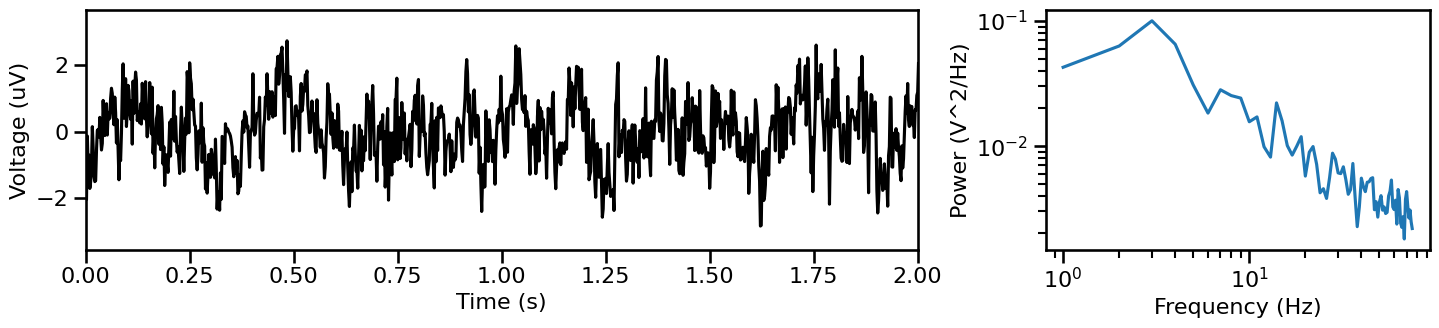

In [12]:
plot_timeseries_and_psd(times, sig_pow, fs)

### Continuous Oscillation

Next, we can simulate an  oscillation, in this case, a continuous sinusoid.

In [13]:
# Simulate an oscillation
sig_osc = sim_oscillation(n_seconds, fs, freq=default_freq)

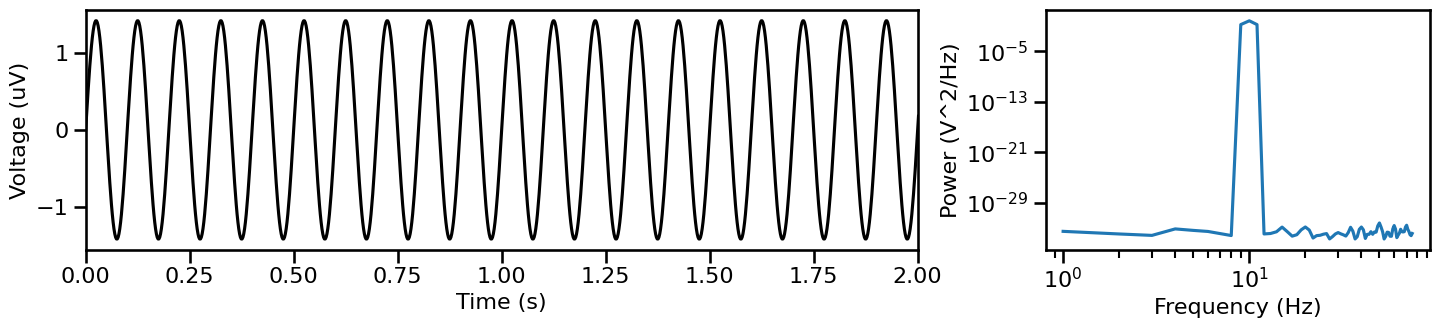

In [14]:
plot_timeseries_and_psd(times, sig_osc, fs)

### Combined Signal

Now we can can combine the aperiodic and periodic components from above, and create a combined signal.

In [15]:
# Simulate a combined signal, with an aperiodic and a periodic component
sig_comb = sim_combined(n_seconds, fs, comps_osc)

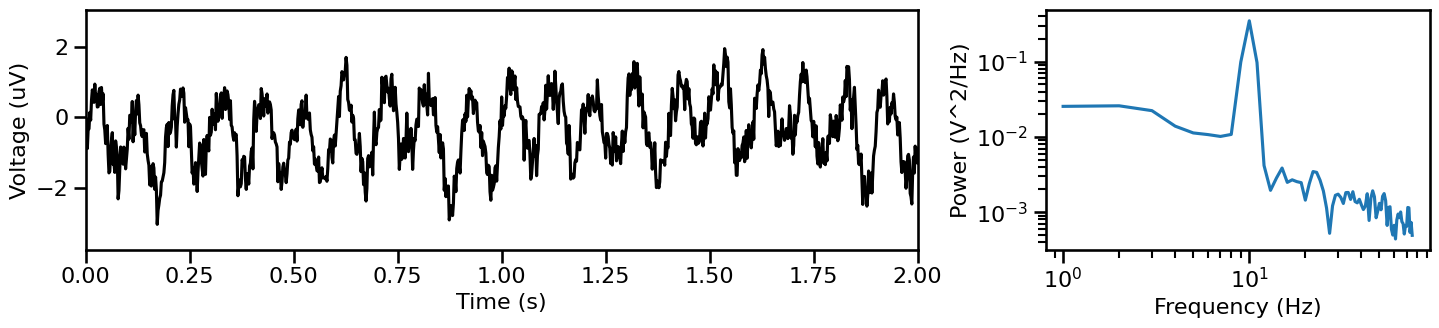

In [16]:
plot_timeseries_and_psd(times, sig_comb, fs)

### Synpatic Signal: Aperiodic Activity with a Knee

There are different possible ways to simulate aperiodic activity.

In this next simulation, we will simulate a 'synpatic current' model, which creates aperiodic activity with a knee.

In [17]:
# Simulate aperiodic activity from a synaptic current model
sig_kn = sim_synaptic_current(n_seconds, fs)

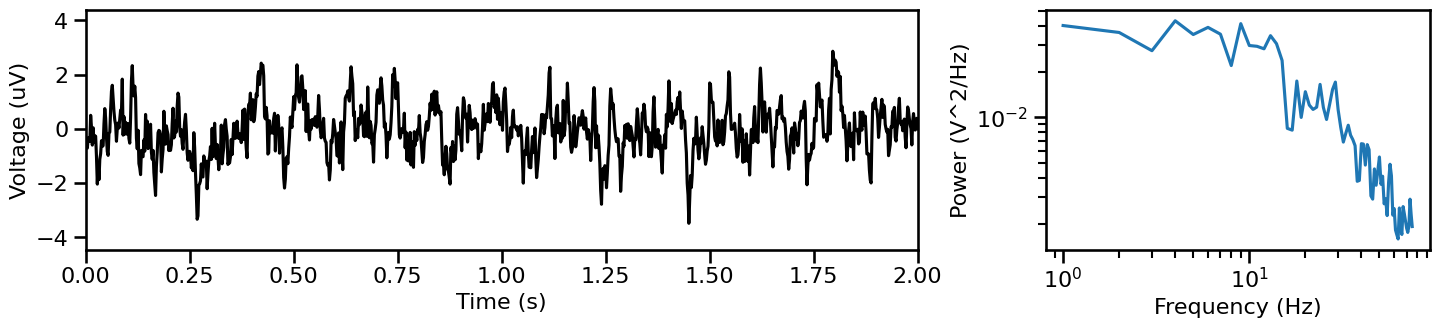

In [18]:
plot_timeseries_and_psd(times, sig_kn, fs)

### Bursty Oscillation

Oscillations are also not necessarily continuous. We we will simulate a combined signal with a bursty oscillation.

In [19]:
# Simulate a combined signal with a bursty oscillation
sig_burst = sim_combined(n_seconds, fs, comps_burst)

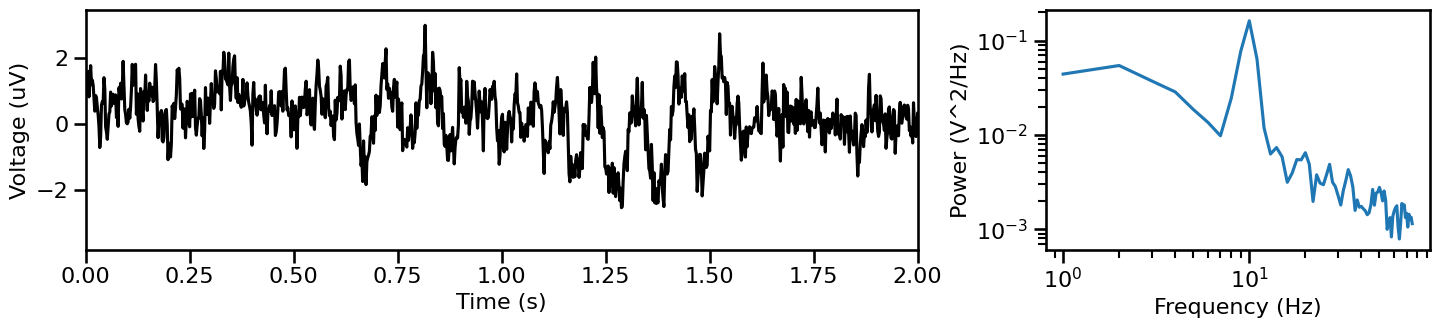

In [20]:
plot_timeseries_and_psd(times, sig_burst, fs)

### Peak Signal

Another dimension that signals can vary in is the bandwidth of a peak. Here, we will create a simulation in which we can specify the bandwidth of an oscillatory peak, that is simulated on top of an aperiodic component.

In [21]:
# Simulate a signal with a peak of a defined bandwidth
sig_peak = sim_peak_oscillation(sig_pow, fs, **peak_params)

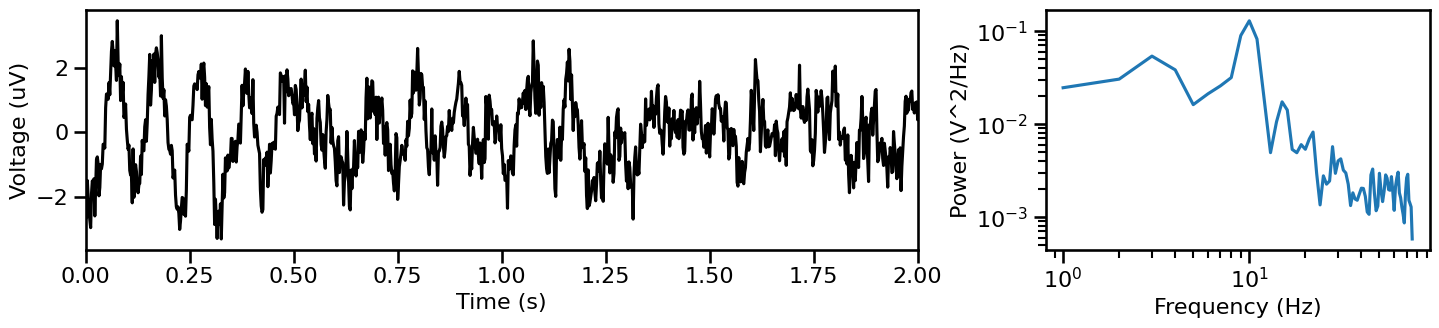

In [22]:
plot_timeseries_and_psd(times, sig_peak, fs)

## Example Time Series

In the notebooks that follow, you will see that measures are applied to a set of 'example' time series. 

These examples are time series that have been pre-computed, using the functions above. 

This set of example signals is shown here.

/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:128: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:128: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:128: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:128: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:128: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


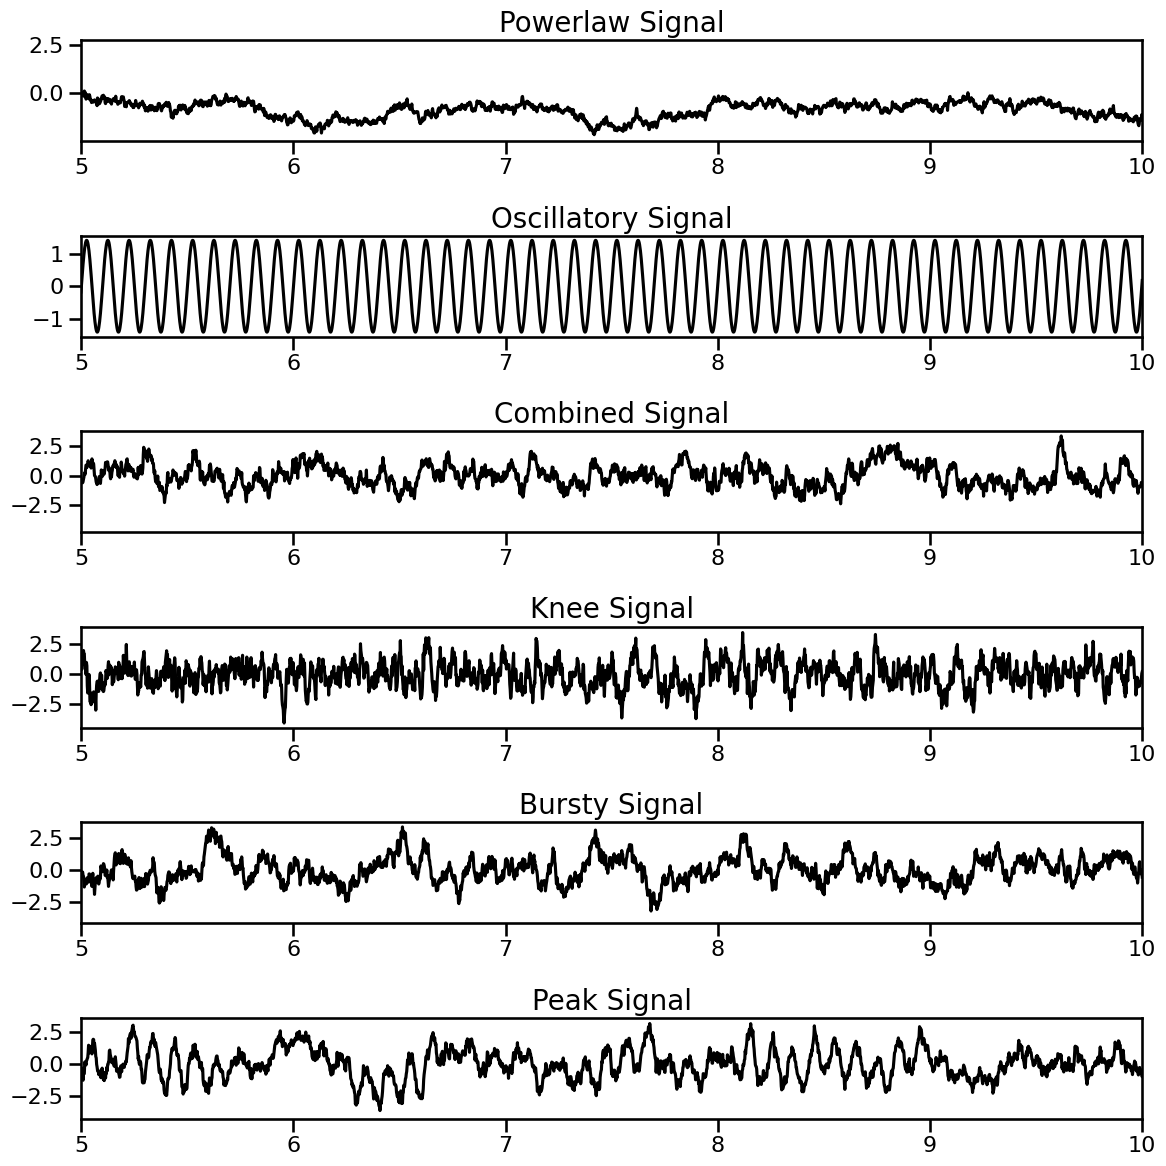

In [23]:
xlim = [5, 10]
_, axes = plt.subplots(6, 1, figsize=(12, 12))
plot_time_series(TIMES, SIG_AP, title='Powerlaw Signal', xlim=xlim, **plt_kwargs, ax=axes[0])
plot_time_series(TIMES, SIG_OSC, title='Oscillatory Signal', xlim=xlim, **plt_kwargs, ax=axes[1])
plot_time_series(TIMES, SIG_COMB, title='Combined Signal', xlim=xlim, **plt_kwargs, ax=axes[2])
plot_time_series(TIMES, SIG_KN, title='Knee Signal', xlim=xlim, **plt_kwargs, ax=axes[3])
plot_time_series(TIMES, SIG_BURST, title='Bursty Signal', xlim=xlim, **plt_kwargs, ax=axes[4])
plot_time_series(TIMES, SIG_PEAK, title='Peak Signal', xlim=xlim, **plt_kwargs, ax=axes[5])

### Create sets of simulations

In general, simulating new time series is quite fast, and we can do so on the fly. 

However, creating some time series is quite slow, and/or we might want to test multiple different analyses on the exact same set of simulations. To support this, here we generate sets of simulations that can be saved out and then reloaded when needed. 

In [24]:
# Simulate a predefined set of exponent variation simulations
sigs_ap = sim_across_values(sim_powerlaw, SIM_PARAMS_AP, 'update_exp', EXPS, N_SIMS)
save_pickle(sigs_ap, 'ts_sims_ap_exp', SIMPATH)

In [25]:
# Simulate a predefined set of combined exponent variation simulations
sigs_comb = sim_across_values(sim_combined, SIM_PARAMS_COMB, 'update_comb_exp', EXPS, N_SIMS)
save_pickle(sigs_comb, 'ts_sims_comb_exp', SIMPATH)

In [26]:
# Simulate a predefined set of combined frequency variation simulations
sigs_freq = sim_across_values(sim_combined, SIM_PARAMS_COMB, 'update_freq', FREQS, N_SIMS)
save_pickle(sigs_freq, 'ts_sims_comb_freq', SIMPATH)

In [27]:
# Simulate a predefined set of combined oscillation power simulations
sigs_pow = sim_across_values(sim_combined, SIM_PARAMS_COMB, 'update_pow', POWERS, N_SIMS)
save_pickle(sigs_pow, 'ts_sims_comb_pow', SIMPATH)

In [28]:
# Simulate a predefined set of aperiodic knee variation simulations
sigs_knee = sim_across_values(sim_synaptic_current, SIM_PARAMS_KNEE, 'update_knee', KNEES, N_SIMS)
save_pickle(sigs_knee, 'ts_sims_ap_knee', SIMPATH)

In [29]:
# Simulate a predefined set of combined peak bandwidth variation simulations
sigs_bw = sim_across_values(sim_combined_peak, SIM_PARAMS_PEAK, 'update_peak_bw', BWS, N_SIMS)
save_pickle(sigs_bw, 'ts_sims_comb_bw', SIMPATH)

## Power Spectrum Simulations

Power spectra are simulated using [SpecParam](https://fooof-tools.github.io/). 

### Single Peak & Fixed Mode

First, we can simulate a power spectrum with a single peak with a 1/f aperiodic component. 

In [30]:
# Simulate a power spectrum
freqs, powers = gen_power_spectrum([3, 40], [1, 1], [10, 0.3, 1], nlv=0.025)

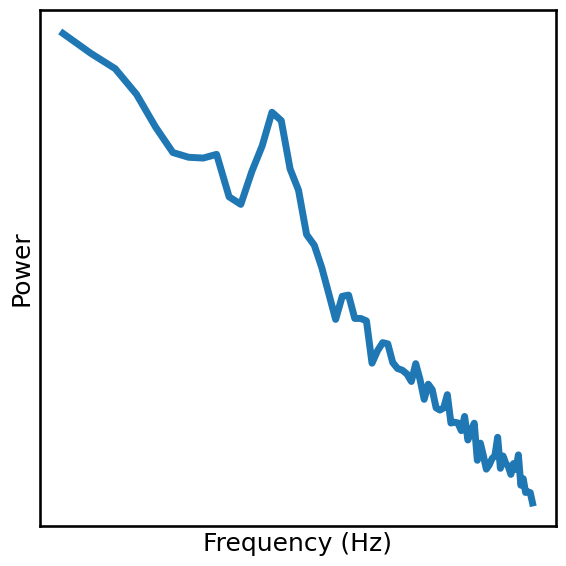

In [31]:
# Plot the power spectrum
plot_power_spectra(freqs, powers, lw=5, ylabel='Power', custom_styler=custom_psd_style,
                   save_fig=SAVE_FIG, file_name='psd_fixed' + EXT, file_path=FIGPATH)

### Multi-Peak & Knee Mode

Next, we can simulate a pwoer spectrum that has multiple peaks, and an aperiodic component with a knee.

In [32]:
# Simulate a power spectrum, with a knee
freqs, powers = gen_power_spectrum([1, 75], [0, 400, 1], [[5, 0.025, 1], [30, 0.02, 4]], nlv=0.001)

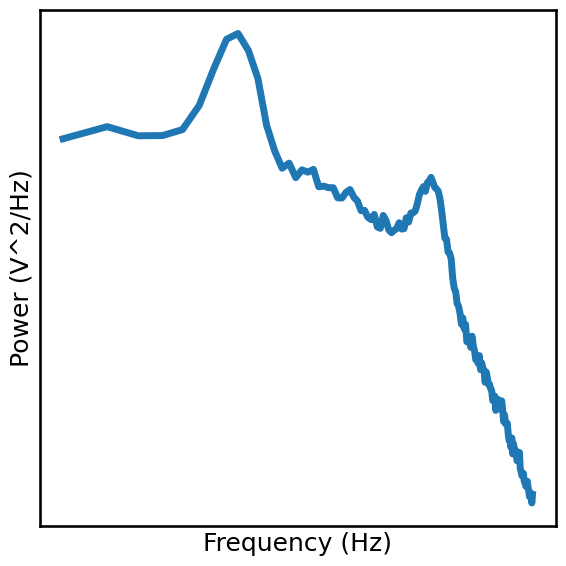

In [33]:
# Plot the power spectrum
plot_power_spectra(freqs, powers, lw=5, custom_styler=custom_psd_style,
                   save_fig=SAVE_FIG, file_name='psd_knee' + EXT, file_path=FIGPATH)